In [1]:
%matplotlib inline

In [2]:
import json
from pandas.io.json import json_normalize
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
pd.DataFrame(df.iloc[:,:11].skew())

,0
Id,0.000000
Elevation,0.075640
Aspect,0.450935
Slope,0.523658
Horizontal_Distance_To_Hydrology,1.488052
Vertical_Distance_To_Hydrology,1.537776
Horizontal_Distance_To_Roadways,1.247811
Hillshade_9am,-1.093681
Hillshade_Noon,-0.953232
Hillshade_3pm,-0.340827


In [5]:
df.iloc[:,:11].corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162


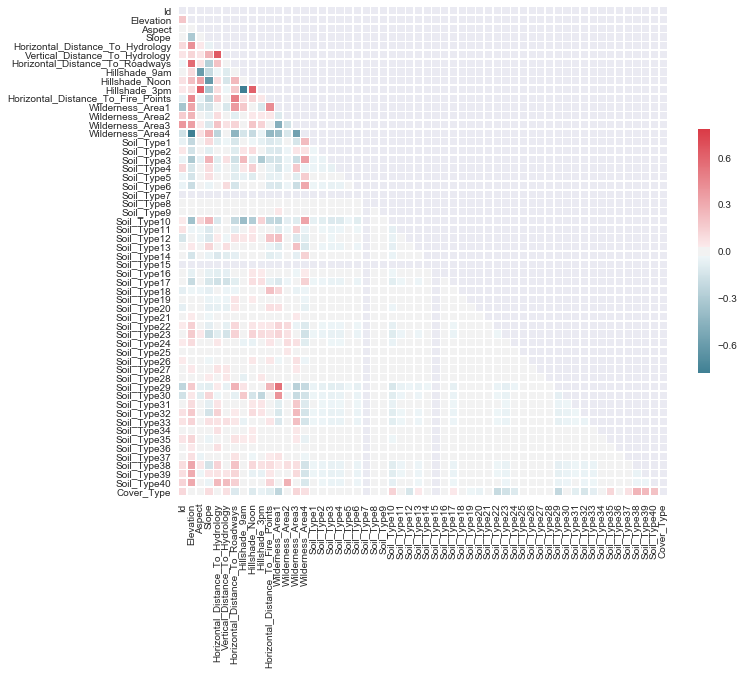

In [6]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

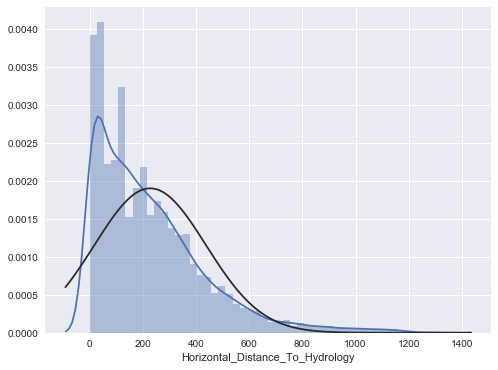

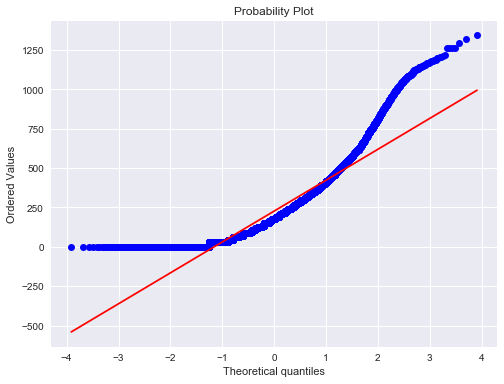

In [7]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(df['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df['Horizontal_Distance_To_Hydrology'], plot=plt)

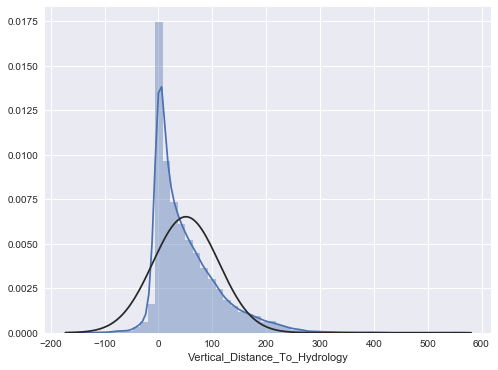

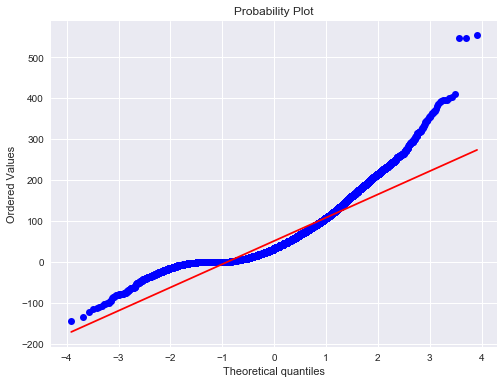

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(df['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df['Vertical_Distance_To_Hydrology'], plot=plt)

In [9]:
tf = df.iloc[:, :11]
tf.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,1,2596,51,3,258,0,510,221,232,148,6279
1,2,2590,56,2,212,-6,390,220,235,151,6225
2,3,2804,139,9,268,65,3180,234,238,135,6121
3,4,2785,155,18,242,118,3090,238,238,122,6211
4,5,2595,45,2,153,-1,391,220,234,150,6172


In [10]:
tf.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


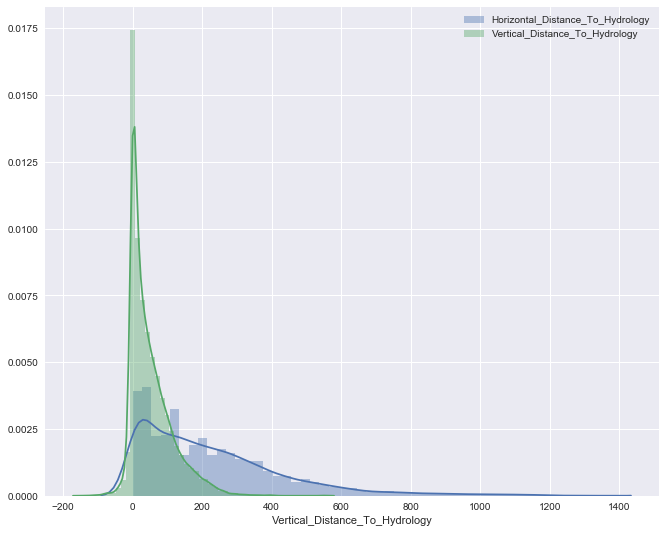

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.distplot(tf.Horizontal_Distance_To_Hydrology, hist=True, label="Horizontal_Distance_To_Hydrology");
sns.distplot(tf.Vertical_Distance_To_Hydrology, hist=True, label="Vertical_Distance_To_Hydrology");

plt.legend();

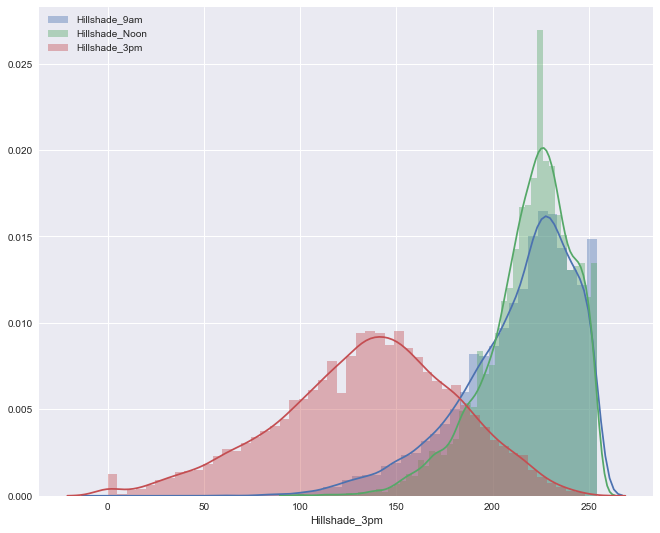

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.distplot(tf.Hillshade_9am, hist=True, label="Hillshade_9am");
sns.distplot(tf.Hillshade_Noon, hist=True, label="Hillshade_Noon");
sns.distplot(tf.Hillshade_3pm, hist=True, label="Hillshade_3pm");

plt.legend();

In [13]:
import scipy.stats as stats

In [14]:
horz = tf.Horizontal_Distance_To_Hydrology
vert = tf.Vertical_Distance_To_Hydrology

stats.ttest_rel(horz, vert)


Ttest_relResult(statistic=122.79635591963883, pvalue=0.0)

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

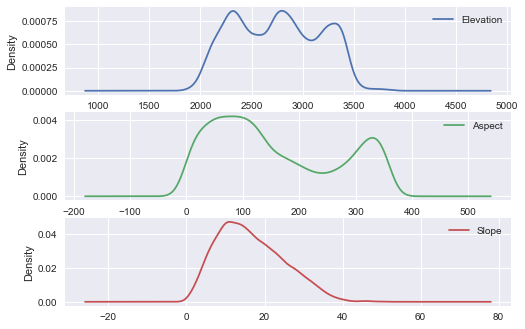

In [16]:
tf.iloc[: , 1:4].plot(kind='density', subplots=True,sharex=False)
plt.show()

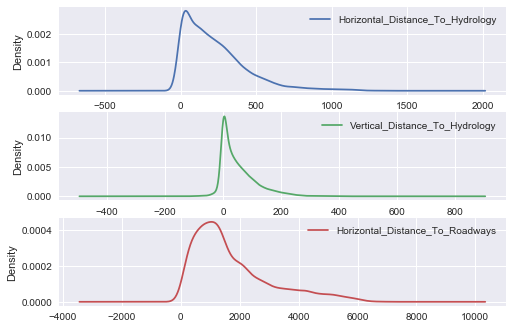

In [17]:
tf.iloc[: , 4:7].plot(kind='density', subplots=True,sharex=False)
plt.show()

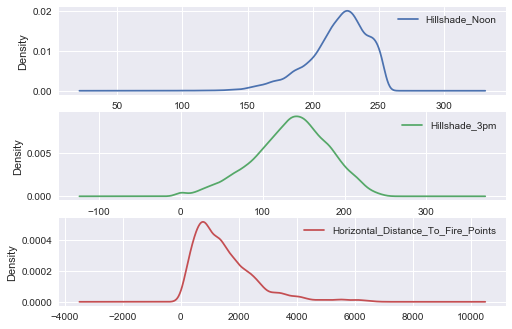

In [18]:
tf.iloc[: , 8:11].plot(kind='density', subplots=True,sharex=False)
plt.show()

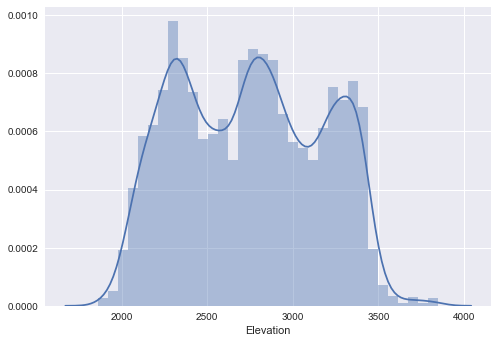

In [19]:
elevations = df['Elevation']
elevations = elevations.fillna(elevations.mean())

sns.distplot(elevations)

In [20]:
stats.normaltest(elevations)

NormaltestResult(statistic=5560.3715715406952, pvalue=0.0)


# Z-Score and P-Value
The z-score and p-value are central to almost every statistical inference tool and hypothesis testing methods. The Z-score is measure of how many standard deviations away from the mean, a particular sample point is. The p-value gives us the probability that of getting a z-score less than or equal to the given z-score and in a sense, is a measure of the number of sample points that have a z-score less than or equal to the corresponding value of z.

The Scipy package gives us two very useful functions to get the p-value for a given z-score and vice versa. The code below tries to calculate the number of sample points that fall within one, two and three standard deviations from the mean.

In [21]:
def pvalue(z):
    return 1 - 2 * (1 - stats.norm.cdf(z))

In [22]:

pvalue(1), pvalue(2), pvalue(3)

(0.68268949213708585, 0.95449973610364158, 0.99730020393673979)

In [23]:

def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [24]:

zscore(0.50), zscore(0.68), zscore(0.99)

(0.67448975019608171, 0.99445788320975348, 2.5758293035489004)